<a href="https://colab.research.google.com/github/momohhellen/saar/blob/main/Momoh_NLP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! jupyter nbconvert --to html Momoh_NLP_Project.ipynb

[NbConvertApp] Converting notebook Momoh_NLP_Project.ipynb to html
[NbConvertApp] Writing 2720028 bytes to Momoh_NLP_Project.html


Hellen Momoh NLP-Project

Background and Context:

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.



Data Description:

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").



Dataset:

The dataset has the following columns:

tweet_id                                                           
airline_sentiment                                               
airline_sentiment_confidence                               
negativereason                                                   
negativereason_confidence                                    
airline                                                                    
airline_sentiment_gold                                              
name     
negativereason_gold
retweet_count
text
tweet_coord
tweet_created
tweet_location
user_timezone


In [ ]:
# install and import necessary libraries.

!pip install contractions

import re, string, unicodedata
import contractions
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('omw-1.4')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 12.3 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from google.colab import files
upload = files.upload()

Saving Tweets.csv to Tweets.csv


In [ ]:
data = pd.read_csv("Tweets.csv")

In [ ]:
#Looking at the shape of the dataset, we see that the data has 14640 rows and 15 columns
data.shape

(14640, 15)

In [ ]:
#Displaying the first 5 rows of the dataset
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
#Checking for missing values
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

Observation

Our dataset has all int values with missing values from the listed columns.

negativereason                   5462
negativereason_confidence        4118
airline_sentiment_gold          14600
negativereason_gold             14608
tweet_coord                     13621
tweet_location                   4733
user_timezone                    4820
dtype: int64





In [ ]:
#Functions to create labeled barplots

# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

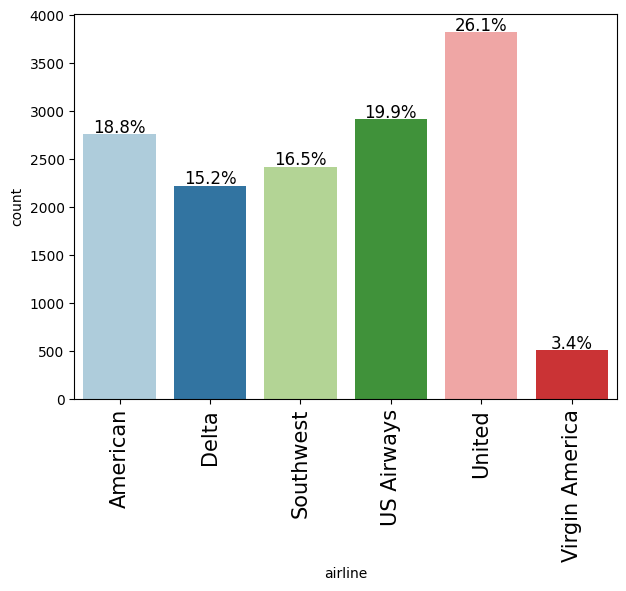

In [ ]:
#Percentage of tweets for each airline
labeled_barplot(data, "airline", perc=True)

We see the percentages of tweets of five airlines. American airline has 18.8%, Delta = 15.2%, Southwest has 16.5%, US Airways is 19.9%, United = 26.1% and Virgin America has 3.4% .

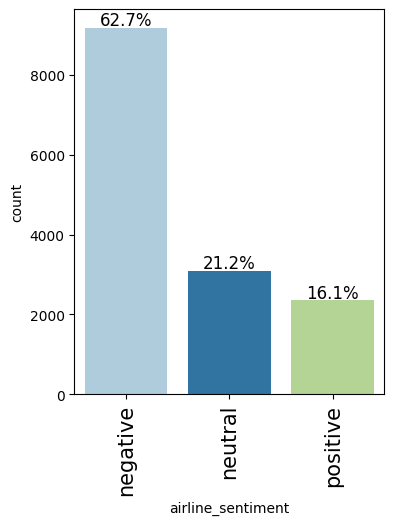

In [ ]:
#Distribution of sentiments across all the tweets
labeled_barplot(data, "airline_sentiment", perc=True)

From the above, we see a distribution of sentiments across all tweets where the negative tweets have 62.7% ratings, the positive ones have 16.1% ratings and the neutral tweets have 21.2% ratings.

<Axes: xlabel='airline'>

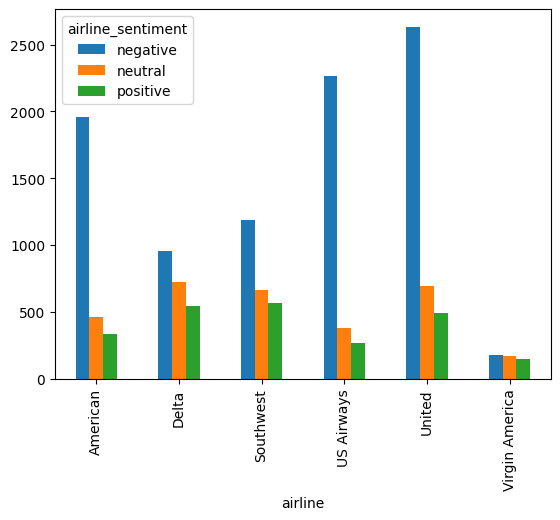

In [ ]:
#Distribution of Sentiment of tweets for each airline
airline_sentiment =  data.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')

The distribution plot above shows the sentiment of tweets for each airline.
The blue color represents negative tweets, the orange color represents neutral tweets and the green color represents the positive tweets

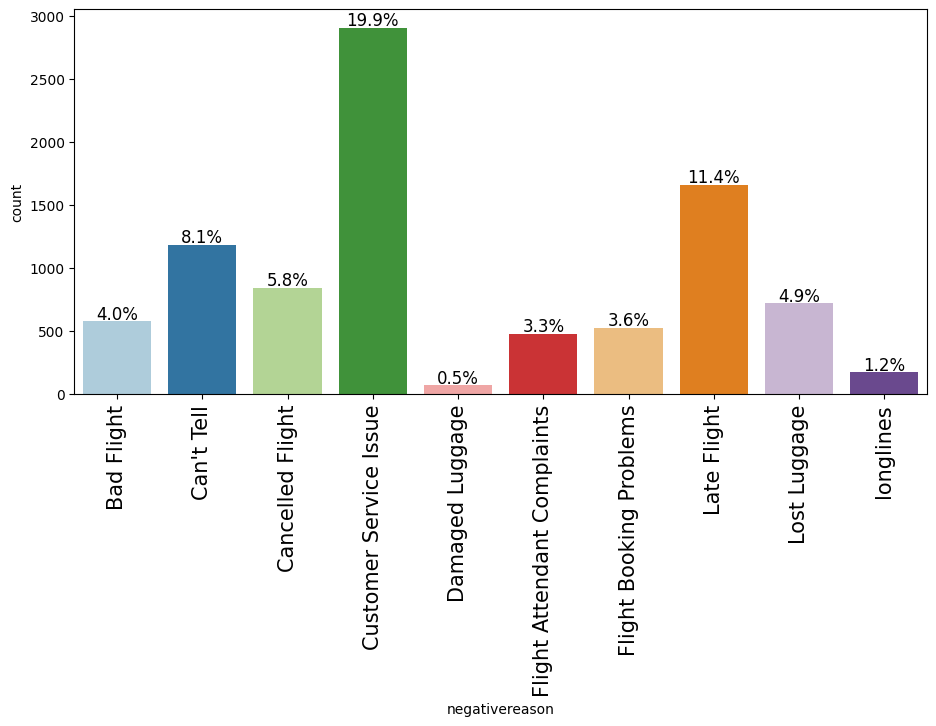

In [ ]:
#plot of all the negative reasons
labeled_barplot(data, "negativereason", perc=True)

The above reasons influenced the negative ratings at each airline.

In [ ]:
#Word Cloud for the negative Tweets
airline_tweets=data[data['airline_sentiment']=='airline_sentiment_confidence']
words = ' '.join(data['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])

In [ ]:
# applying stopwords on cleaned words
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

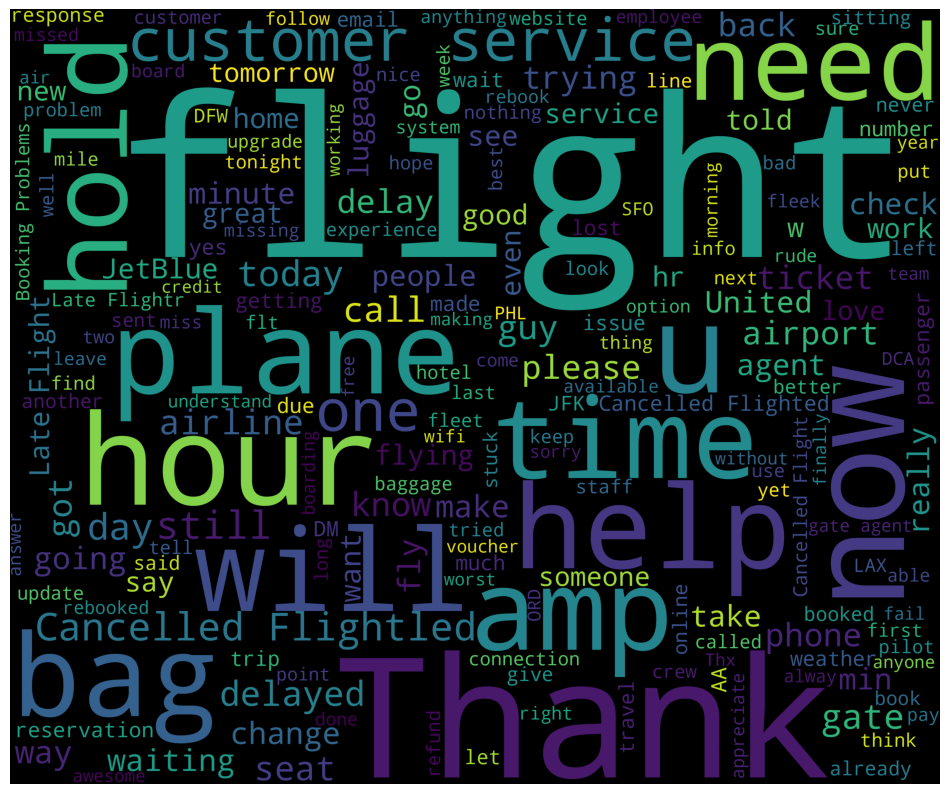

In [ ]:
#ploting the wordcloud
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Words like delayed, cancelled flight, baggage and refund were some of the important recurring words observed in the negative reviews.

In [ ]:
#Wordcloud for positive reasons
airline_tweets=data[data['negativereason']=='airline_sentiment']
words = ' '.join(data['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [ ]:
# applying stopwords on cleaned words
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

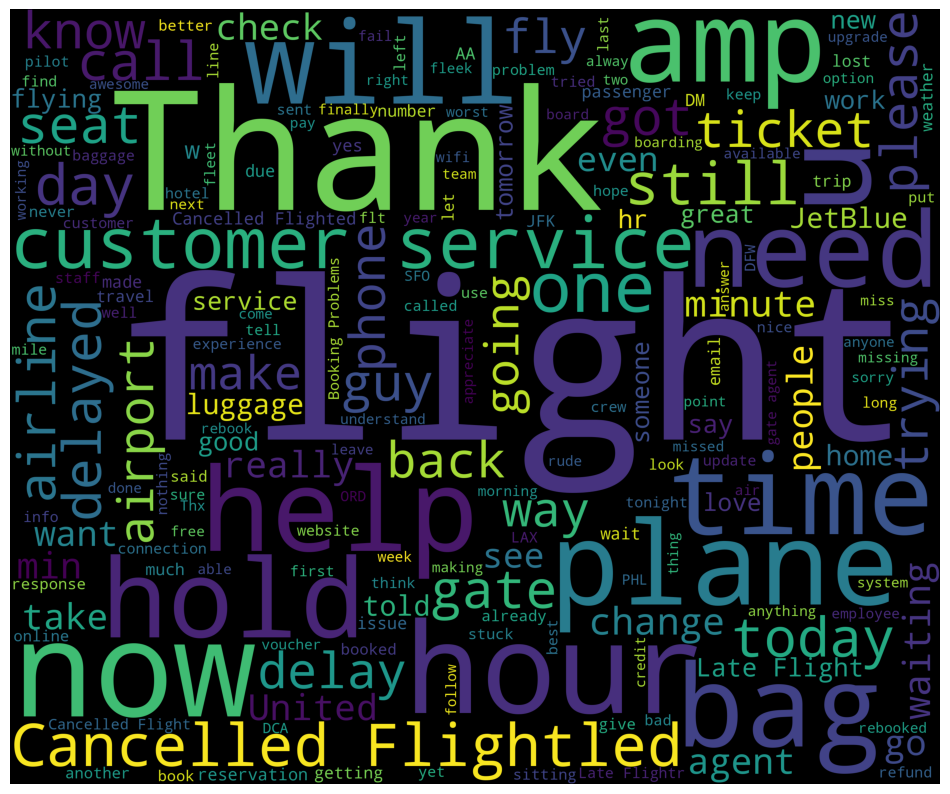

In [ ]:
#Plotting the wordcloud
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Words like love, voucher, appreciate and great contributed to the positive reviews

In [ ]:
#Taking the column whcih are relevant for sentiment classification
data = data[['text', 'airline_sentiment']]

In [ ]:
# Displaying full dataframe information (Non-turncated Text column.)
#Starting with the first five rows of the dataset
pd.set_option('display.max_colwidth', None)

data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


In [ ]:
 #Displaying the unique values in airline sentiment column
data['airline_sentiment'].nunique()

3

We see that there are three unique values in the airline sentiment column

In [ ]:
# removing the html tags
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

data['text'] = data['text'].apply(strip_html)
data.head()

<ipython-input-21-0b618cce932a>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


In [ ]:
#Replacing contractions in string
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

data['text'] = data['text'].apply(replace_contractions)
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative


In [ ]:
#Removing numbers
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

data['text'] = data['text'].apply(remove_numbers)
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative


In [ ]:
#Applying Tokenization on the text column
data['text'] = data.apply(lambda row: word_tokenize(row['text']), axis=1)
data.head()

,text,airline_sentiment
0,"[@, VirginAmerica, What, @, dhepburn, said, .]",neutral
1,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]",positive
2,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]",neutral
3,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]",negative
4,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]",negative


In [ ]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))

In [ ]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)
data.head()

,text,airline_sentiment
0,virginamerica dhepburn say,neutral
1,virginamerica plus add commercials experience tacky,positive
2,virginamerica not today must mean need take another trip,neutral
3,virginamerica really aggressive blast obnoxious entertainment guests face little recourse,negative
4,virginamerica really big bad thing,negative


In [ ]:
# Completing the initialization on the CountVectorizer function with max_features = 5000.
Count_vec = CountVectorizer(max_features=5000)

# Fiting and transforming the count_vec variable on the text column
data_features = Count_vec.fit_transform(data['text'])

# Converting the dataframe into array
data_features = data_features.toarray()

In [ ]:
 # Checking the shape of the data features
data_features.shape

(14640, 5000)

The shape of the data features shows 14640 rows and 5000columns

In [ ]:
#Storing Independent and Dependent variables
X = data_features

y = data.airline_sentiment

In [ ]:
#Spliting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#Using Random Forest to build model for the classification of reviews

# Creating and fitting the random forest model.
forest = RandomForestClassifier(n_estimators=100, n_jobs=4) # Initializing the Random Forest Classifier
forest = forest.fit(X_train, y_train) # Fitting the forest variable on X_train and y_train

print(forest)
print(np.mean(cross_val_score(forest, X, y, cv=10))) # Calculating cross validation score

RandomForestClassifier(n_jobs=4)
0.7338114754098362


In [ ]:
#Optimizing the parameter: The number of trees in the random forest model(n_estimators)
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]



In [ ]:
cv_scores = [] # Initializing a empty list to store the score
for b in base_ln:
    clf = RandomForestClassifier(n_estimators=b) # Applying Rondome Forest Classifier
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy') #Finding the cross-validation score on the classifier (clf) for accuracy
    cv_scores.append(scores.mean()) # Appending the scores to cv_scores list

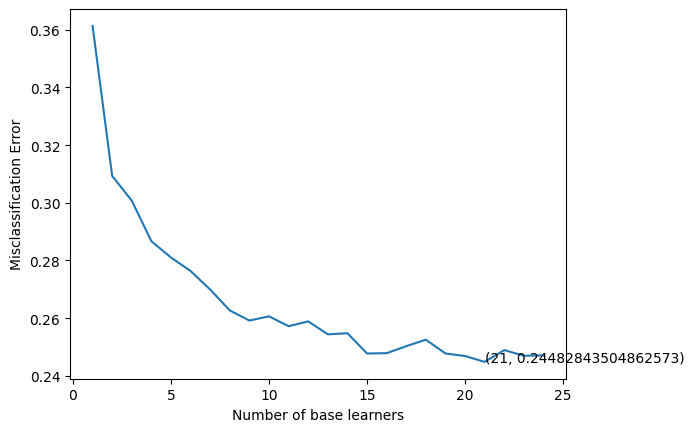

In [ ]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 # Error corresponds to each number of estimator
optimal_learners = base_ln[error.index(min(error))]                # Selection of optimal number of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           # Ploting between each number of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [ ]:
clf = RandomForestClassifier(n_estimators = optimal_learners)                     # Initializing the Random Forest classifier with optimal learners
clf.fit(X_train, y_train)                                               # Fitting  the classifer on X_train and y_train
clf.score(X_test, y_test)                                               # Finding the score on X_train and y_train

0.7718579234972678

In [ ]:
result = forest.predict(X_test) #Predicting the X_test data using the model built above (forest)

In [ ]:
# Printing and ploting Confusion matirx

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

[[2570  192   52]
 [ 392  435   57]
 [ 180  101  413]]


<Axes: >

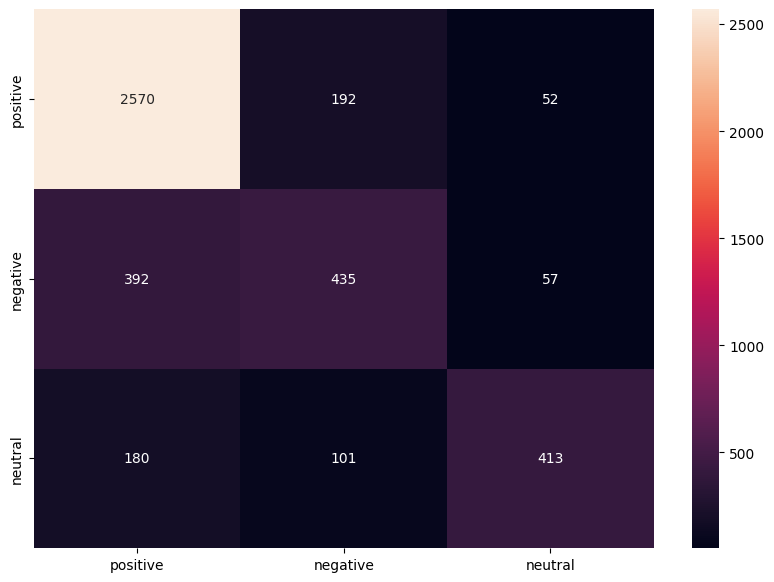

In [ ]:
# Ploting the confusion matrix
df_cm = pd.DataFrame(conf_mat, index = [i for i in ['positive', 'negative', 'neutral']],
                  columns = [i for i in ['positive', 'negative', 'neutral']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

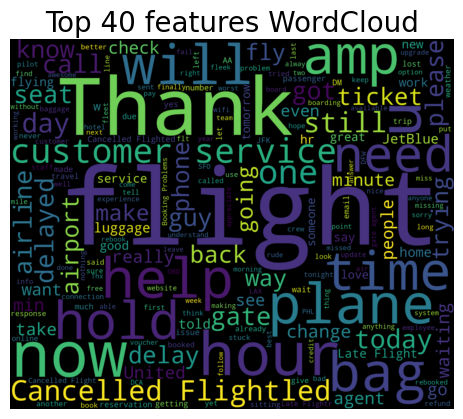

In [ ]:
# Displaying the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

In [ ]:
# Using TfidfVectorizer to convert text data to numbers.

tfidf_vect = TfidfVectorizer(max_features=5000)
data_features = tfidf_vect.fit_transform(data['text'])
data_features = data_features.toarray()

#initialize the TF-IDF vector function with max_features = 5000.
#Fitting the tf idf function on the text column
#Converting the datafram into array

In [ ]:
data_features.shape           #Checking the shape of the data features

(14640, 5000)

In [ ]:
#Storing dependent and independent variables
X = data_features

y = data.airline_sentiment

In [ ]:
# Splitting data into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Using Random Forest to build model for the classification of reviews.

forest = RandomForestClassifier(n_estimators=100, n_jobs=4)            # Initializing the Random Forest Classifier
forest = forest.fit(X_train, y_train)                         # Fitting the forest variable on X_train and y_train
print(forest)
print(np.mean(cross_val_score(forest, X, y, cv=10)))          # Calculating cross validation score

RandomForestClassifier(n_jobs=4)
0.7295765027322405


In [ ]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]

In [ ]:
cv_scores = []
# Initializing a empty list to store the score
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    #Applying Rondome Forest Classifier
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    #Finding the cross-validation score on the classifier (clf) for accuracy
    cv_scores.append(scores.mean())
    # Appending the scores to cv_scores list

In [ ]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.9942427790788446

In [ ]:
# Predicting the result for test data using the model built above.
result =forest.predict(X_test)

<Axes: >

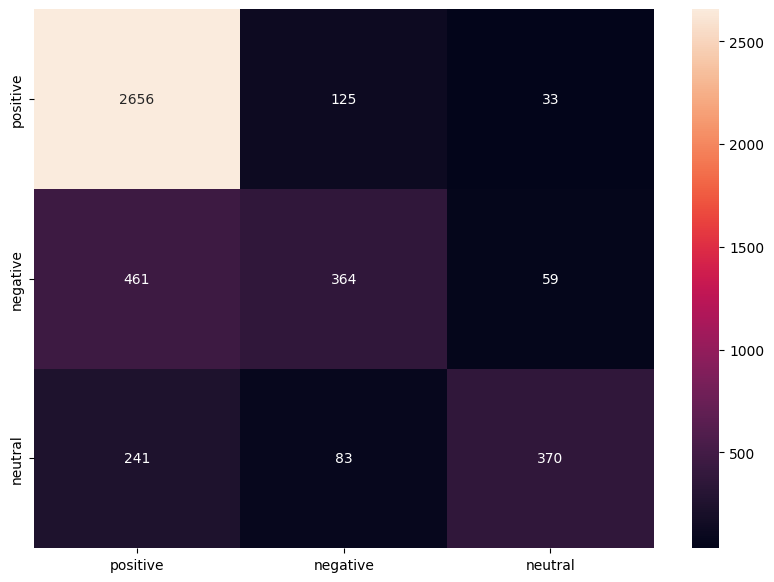

In [ ]:
# Ploting the confusion matrix
conf_mat = confusion_matrix(y_test, result)   #Calculating the confusion matrix between test data and restust


df_cm = pd.DataFrame(conf_mat, index = [i for i in ['positive', 'negative', 'neutral']],columns = [i for i in ['positive', 'negative', 'neutral']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')     #Ploting the heatmap of the confusion matrix

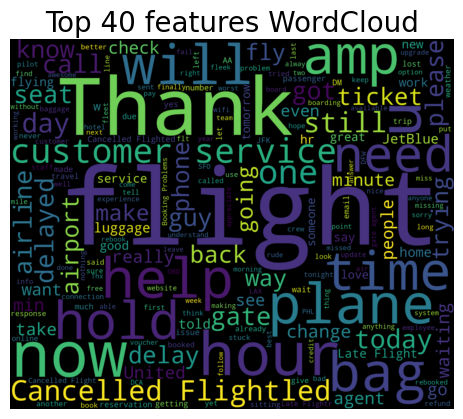

In [ ]:
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

Summary:
We used dataset which has tweets in text format and their sentiment type (positive, negative and neutral).
The goal was to build a model for text-classification.
We created a custom function to plot labeled barplots.
We plotted the percentage of public tweets for each airlines.
We plotted the distribution of sentiment across all the tweets.
We plotted the distribution of tweets for each airline
We plotted the distribution of all the negative reason & found that customer service issue & late fight were the major negative sentiment reason
We plotted the word cloud of positive and negative sentiment tweets.

We Pre-processed the data using variuos techniques and libraries.

The pre-precessed data is converted(vectorized) to numbers, so that we can feed the data in the model.
After building the classification model, we predicted the result for the test data.
We trained the model and optimize the parameter that led to significant increase in the overall accuracy
After that we saw that using the above techniques, our model performed good in perspective of how the text classification models perform.
We can increase the max_feature parameter in the vectorizer &we can also apply other model and hyperparameter tuning to increase the overall accuracy.
One more way to increase accuracy is to use different variations of Pre-processing techniques.

**Business Recommendation**

During the entire pre-processing and model building stages, we saw the different factors in the wordcloud that had influenced the negative and positive reviews for the different airlines. Our best model while training and calculating on test data scored 0.9942427790788446, which indicates that the factors that led to the reviews were realistic and they should be considered when imporving customers' needs and satisfactions at the different arilines.